## Necessary Imports 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


## Implementing ML Models for each dataset: 

In [2]:
regression1 = pd.read_csv('regression_1.csv')
regression2 = pd.read_csv('regression_2.csv')
classification = pd.read_csv('classification.csv')


In [3]:
classification.head(1)

,x1,x2,label
0,-10.09795,-3.23026,1


In [4]:
reg_model_1 = LinearRegression().fit(regression1.iloc[:, 0].values.reshape(-1,1), regression1.iloc[:, 1])
reg_model_2 = LinearRegression().fit(regression2.iloc[:, 0].values.reshape(-1,1), regression2.iloc[:, 1])

clf_model = SVC(kernel='linear').fit(classification.iloc[:, :2], classification.iloc[:, 2])

In [5]:
regression1.iloc[:, 0].values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2])

In [6]:
reg_model_1,clf_model,reg_model_2

(LinearRegression(), SVC(kernel='linear'), LinearRegression())

## Plotting Models : 

### Regression 1 with fitted line : 

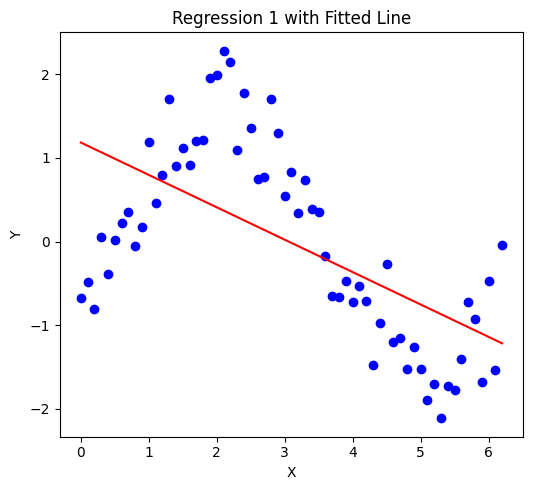

In [7]:
plt.figure(figsize=(15, 5))

# Plotting Regression 1 with fitted line
plt.subplot(1, 3, 1)
plt.scatter(regression1.iloc[:, 0], regression1.iloc[:, 1], color='blue')
plt.plot(regression1.iloc[:, 0], reg_model_1.predict(regression1.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 1 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

### Regression 2 with fitted line : 

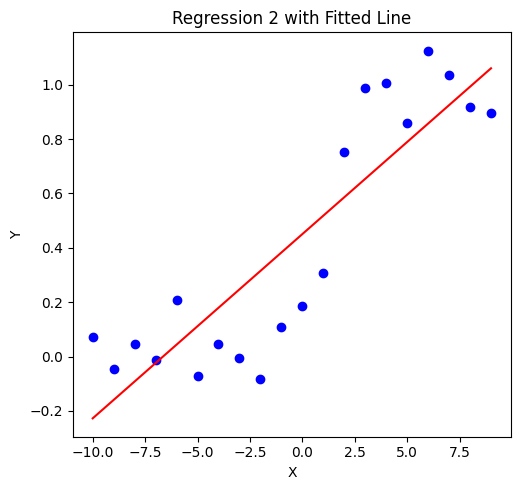

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 2)
plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
plt.plot(regression2.iloc[:, 0], reg_model_2.predict(regression2.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 2 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

## Using a polynomial model for regression 2: 

Text(0, 0.5, 'Y')

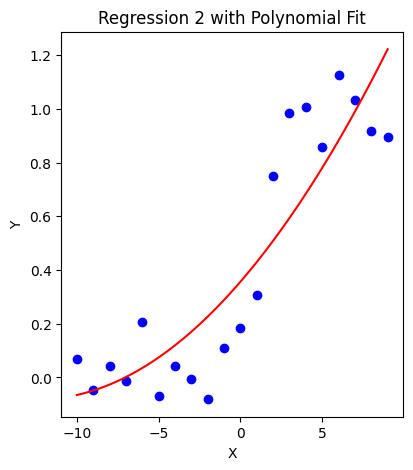

In [9]:
# Polynomial feature transformer (degree can be tuned)
poly_features = PolynomialFeatures(degree=2)
# Transform the features into polynomial features
X_poly = poly_features.fit_transform(regression2.iloc[:, 0].values.reshape(-1, 1))
# Creating a regression model and fit it on the polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, regression2.iloc[:, 1])

plt.figure(figsize=(15, 5))
# Regression 2 with Polynomial Regression
plt.subplot(1, 3, 2)
# Generate a range of values from min to max x
x_range = np.linspace(regression2.iloc[:, 0].min(), regression2.iloc[:, 0].max(), 100).reshape(-1, 1)
# Transform the range into polynomial features
x_range_poly = poly_features.transform(x_range)
plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
plt.plot(x_range, poly_reg_model.predict(x_range_poly), color='red')
plt.title('Regression 2 with Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')


In [10]:
# plt.figure(figsize=(15, 5))
# # Regression 2 with Polynomial Regression
# plt.subplot(1, 3, 2)
# # Generate a range of values from min to max x
# x_range = np.linspace(regression2.iloc[:, 0].min(), regression2.iloc[:, 0].max(), 100).reshape(-1, 1)
# # Transform the range into polynomial features
# x_range_poly = poly_features.transform(x_range)
# plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
# plt.plot(x_range, poly_reg_model.predict(x_range_poly), color='red')
# plt.title('Regression 2 with Polynomial Fit')
# plt.xlabel('X')
# plt.ylabel('Y')


#### Comments about the graphs in Regression 1 and 2 : 

<b>Regression 1:</b> I choose a linear regression model because the apparent linear trend in the data, with the fitted line closely follows the central tendency of the data points.
<br><br>
<b>Regression 2:</b> I used a polynomial regression model to capture the non-linear trend observed in the data. The second-degree polynomial provide a good fit, modeling the curvature observed among the data points without appearing to overfit. 
I choose the degree of polynomial as 2 because it was the capturing the pattern keeping the model simple.                                   

### Plotting Classification with decision boundary


/home/harsh/.local/share/virtualenvs/DataScience_Survival_Skills-l0MxnZLg/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


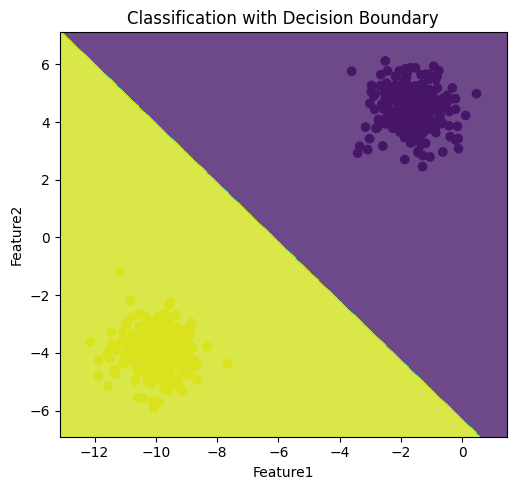

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.scatter(classification.iloc[:, 0], classification.iloc[:, 1], c=classification.iloc[:, 2])
# mesh creation for decision boundaries
x_min, x_max = classification.iloc[:, 0].min() - 1, classification.iloc[:, 0].max() + 1
y_min, y_max = classification.iloc[:, 1].min() - 1, classification.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.title('Classification with Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()


#### Comments about the graphs in Classification model: 

<b>Classification:</b>I used a linear SVM, and the resulting decision boundary shows a good separation of the two classes. This model choice is supported by the initial visual assessment that the classes are fairly linearly separable.

### All 3 Plots together (Same code as above)

/home/harsh/.local/share/virtualenvs/DataScience_Survival_Skills-l0MxnZLg/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


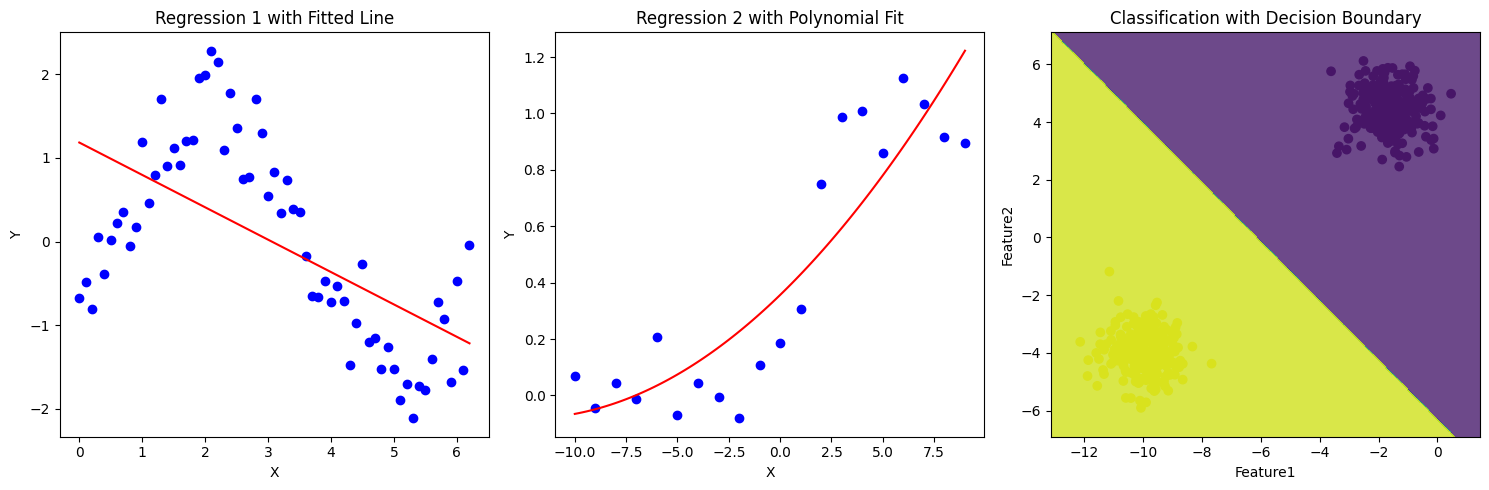

In [12]:

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(regression1.iloc[:, 0], regression1.iloc[:, 1], color='blue')
plt.plot(regression1.iloc[:, 0], reg_model_1.predict(regression1.iloc[:, 0].values.reshape(-1, 1)), color='red')
plt.title('Regression 1 with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')

# plt.subplot(1, 3, 2)
# plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
# plt.plot(regression2.iloc[:, 0], reg_model_2.predict(regression2.iloc[:, 0].values.reshape(-1, 1)), color='red')
# plt.title('Regression 2 with Fitted Line')
# plt.xlabel('X')
# plt.ylabel('Y')


# Regression 2 with Polynomial Regression
plt.subplot(1, 3, 2)
# Generate a range of values from min to max x
x_range = np.linspace(regression2.iloc[:, 0].min(), regression2.iloc[:, 0].max(), 100).reshape(-1, 1)
# Transform the range into polynomial features
x_range_poly = poly_features.transform(x_range)
plt.scatter(regression2.iloc[:, 0], regression2.iloc[:, 1], color='blue')
plt.plot(x_range, poly_reg_model.predict(x_range_poly), color='red')
plt.title('Regression 2 with Polynomial Fit')
plt.xlabel('X')
plt.ylabel('Y')

plt.subplot(1, 3, 3)
plt.scatter(classification.iloc[:, 0], classification.iloc[:, 1], c=classification.iloc[:, 2])
# mesh creation for decision boundaries
x_min, x_max = classification.iloc[:, 0].min() - 1, classification.iloc[:, 0].max() + 1
y_min, y_max = classification.iloc[:, 1].min() - 1, classification.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.title('Classification with Decision Boundary')
plt.xlabel('Feature1')
plt.ylabel('Feature2')

plt.tight_layout()
plt.show()


## Cross validation and Regularization for the 3 models : 

### Cross-Validation and Regularization for regression1

In [13]:
cv_scores_regression1 = cross_val_score(reg_model_1, regression1.iloc[:, 0].values.reshape(-1, 1), 
                                        regression1.iloc[:, 1], cv=5, scoring='neg_mean_squared_error')
cv_scores_regression1

array([-5.94914729, -2.51424391, -0.74610963, -0.5267438 , -0.95748568])

In [14]:
cv_scores_regression1_mean = cv_scores_regression1.mean()
cv_scores_regression1_std = cv_scores_regression1.std()
cv_scores_regression1_mean,cv_scores_regression1_std

(-2.1387460616667675, 2.0294590289250114)

In [15]:
print("Cross-Validation Scores for Regression 1 (Negative MSE):", cv_scores_regression1)
print("Mean of CV Scores for Regression 1:", cv_scores_regression1_mean)
print("Standard Deviation of CV Scores for Regression 1:", cv_scores_regression1_std)


Cross-Validation Scores for Regression 1 (Negative MSE): [-5.94914729 -2.51424391 -0.74610963 -0.5267438  -0.95748568]
Mean of CV Scores for Regression 1: -2.1387460616667675
Standard Deviation of CV Scores for Regression 1: 2.0294590289250114


### Polynomial Regression with rigid regularization and cross validation: 

In [16]:
degree = 2 
alpha = 0.1

# Creating pipeline that creates polynomial features, then applies Ridge regression
polynomial_ridge = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
X = regression2.iloc[:, 0].values.reshape(-1,1)
y = regression2.iloc[:,1]
polynomial_ridge.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.1))])

In [17]:
# Cross-validation to evaluate the model performance

cv_scores = cross_val_score(polynomial_ridge, X, y, cv=5, scoring='neg_mean_squared_error')
cv_scores

array([-0.1750931 , -0.0273325 , -0.12317603, -0.17642718, -0.61820617])

In [18]:
cv_scores_mean = cv_scores.mean()
cv_scores_std = cv_scores.std()
cv_scores_mean,cv_scores_std

(-0.2240469977989032, 0.20440016200919986)

In [19]:
# Use the fitted model to predict on the training data and calculate mean squared error
y_pred = polynomial_ridge.predict(X)
mse = mean_squared_error(y, y_pred)

print("Cross-Validation Scores (Negative MSE):", cv_scores)
print("Mean of CV Scores:", cv_scores_mean)
print("Standard Deviation of CV Scores:", cv_scores_std)
print("Mean Squared Error on Training Data:", mse)


Cross-Validation Scores (Negative MSE): [-0.1750931  -0.0273325  -0.12317603 -0.17642718 -0.61820617]
Mean of CV Scores: -0.2240469977989032
Standard Deviation of CV Scores: 0.20440016200919986
Mean Squared Error on Training Data: 0.04041582428174725


### Cross-Validation and Regularization for classification


In [20]:
from sklearn.metrics import accuracy_score


In [21]:
cv_scores_classification = cross_val_score(clf_model, classification.iloc[:, :2], classification.iloc[:, 2], 
                                           cv=5, scoring='accuracy')
cv_scores_classification

array([1., 1., 1., 1., 1.])

In [22]:
cv_scores_classification_mean = cv_scores_classification.mean()
cv_scores_classification_std = cv_scores_classification.std()
cv_scores_classification_mean, cv_scores_classification_std

(1.0, 0.0)

In [23]:

# Fit the model and calculate accuracy on the training data
clf_model.fit(classification.iloc[:, :2], classification.iloc[:, 2])
y_pred_classification = clf_model.predict(classification.iloc[:, :2])
accuracy = accuracy_score(classification.iloc[:, 2], y_pred_classification)
print("Cross-Validation Scores for Classification (Accuracy):", cv_scores_classification)
print("Mean of CV Scores for Classification:", cv_scores_classification_mean)
print("Standard Deviation of CV Scores for Classification:", cv_scores_classification_std)
print("Accuracy on Training Data:", accuracy)


Cross-Validation Scores for Classification (Accuracy): [1. 1. 1. 1. 1.]
Mean of CV Scores for Classification: 1.0
Standard Deviation of CV Scores for Classification: 0.0
Accuracy on Training Data: 1.0


In [24]:
# SVM model for classification with regularization parameter C
C = 1.0  # Regularization parameter. Smaller values specify stronger regularization.

clf_model = SVC(kernel='linear', C=C)

In [25]:
cv_scores_classification = cross_val_score(clf_model, classification.iloc[:, :2], classification.iloc[:, 2], 
                                           cv=5, scoring='accuracy')
cv_scores_classification

array([1., 1., 1., 1., 1.])

In [26]:
cv_scores_classification_mean = cv_scores_classification.mean()
cv_scores_classification_std = cv_scores_classification.std()
cv_scores_classification_mean, cv_scores_classification_std

(1.0, 0.0)

In [27]:

# Fit the model and calculate accuracy on the training data
clf_model.fit(classification.iloc[:, :2], classification.iloc[:, 2])
y_pred_classification = clf_model.predict(classification.iloc[:, :2])
accuracy = accuracy_score(classification.iloc[:, 2], y_pred_classification)
print("Cross-Validation Scores for Classification (Accuracy):", cv_scores_classification)
print("Mean of CV Scores for Classification:", cv_scores_classification_mean)
print("Standard Deviation of CV Scores for Classification:", cv_scores_classification_std)
print("Accuracy on Training Data:", accuracy)


Cross-Validation Scores for Classification (Accuracy): [1. 1. 1. 1. 1.]
Mean of CV Scores for Classification: 1.0
Standard Deviation of CV Scores for Classification: 0.0
Accuracy on Training Data: 1.0
